Importing The Necessary Packages and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the DataSet Using Pandas

In [3]:
df = pd.read_csv("C:/Users/SEUN/Downloads/House_Prediction_Dataset/housing_price_dataset.csv")

Sanity Check Of The DataSet

In [4]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [5]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [6]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [7]:
df.shape

(50000, 6)

In [8]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


Checking For Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [10]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

Checking For Duplicates

In [11]:
df.duplicated().sum()

0

Detecting Outliers

<Axes: xlabel='Bedrooms', ylabel='Price'>

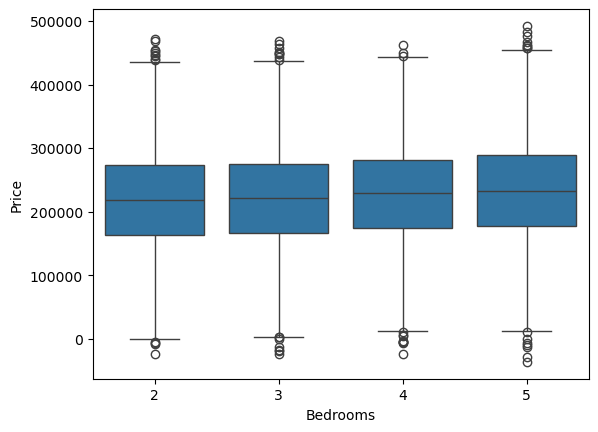

In [12]:
sns.boxplot(data = df,x="Bedrooms",y="Price")

<Axes: xlabel='Bedrooms', ylabel='Price'>

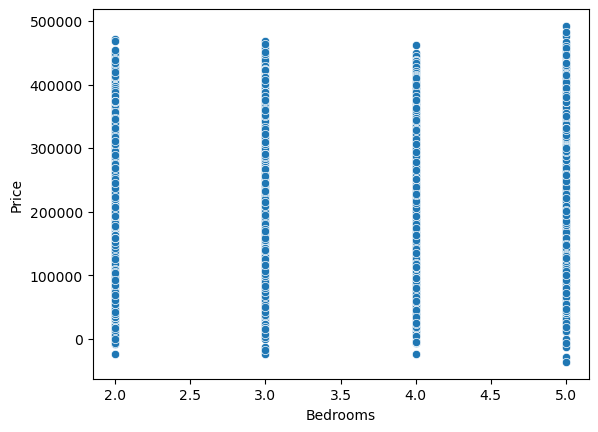

In [13]:
sns.scatterplot(x="Bedrooms",y="Price",data=df)

Using Z Score Method

In [14]:
zscore = df['z_score'] = df["Bedrooms"] - df["Bedrooms"].mean()/df["Bedrooms"].std()
print(zscore)

0        0.865879
1       -0.134121
2       -1.134121
3       -1.134121
4        1.865879
           ...   
49995    1.865879
49996   -1.134121
49997    1.865879
49998    1.865879
49999    1.865879
Name: Bedrooms, Length: 50000, dtype: float64


In [15]:
# DataFrame to store outliers
outliers_df = pd.DataFrame()

for col in df.select_dtypes(include=['number']).columns:
    mean_col = df[col].mean()  # Calculate the mean
    std_col = df[col].std()    # Calculate the standard deviation
    
    # Calculate Z-scores for the column
    z_scores = (df[col] - mean_col) / std_col
    
    # Filter out the rows that are outliers
    outliers = df[(z_scores > 3) | (z_scores > -3)]
    
    # Append the outliers to the DataFrame
    outliers_df = pd.concat([outliers_df, outliers])

Checking For SkewNess 

In [16]:
from scipy.stats import skew

SquareFeet
-0.01116148224206579
Bedrooms
0.004640211102008278
Bathrooms
0.008407412496476778
YearBuilt
0.005556379908596713
Price
-0.008250297254260817
z_score
0.004640211102008278


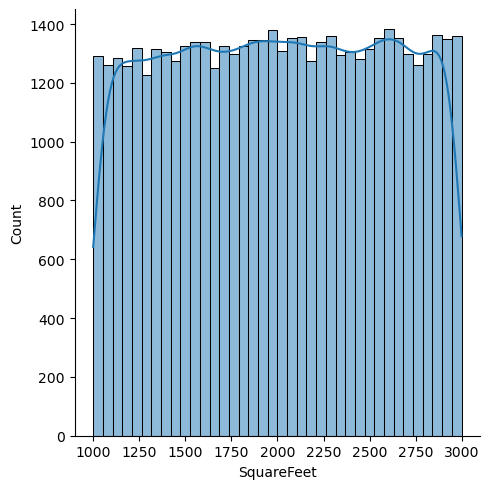

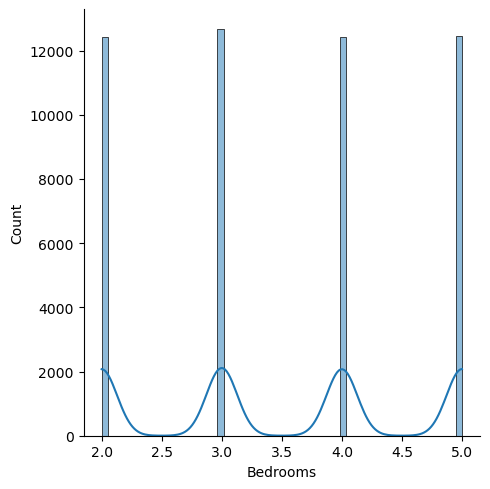

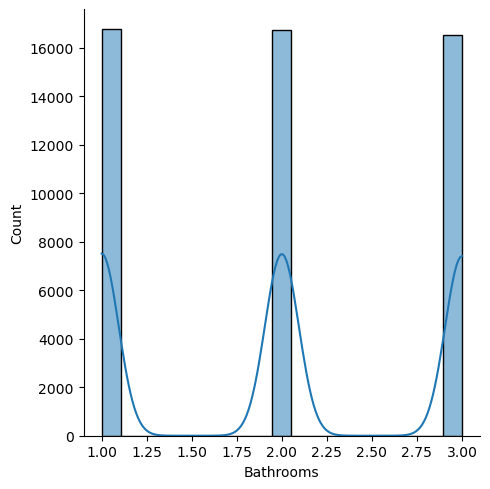

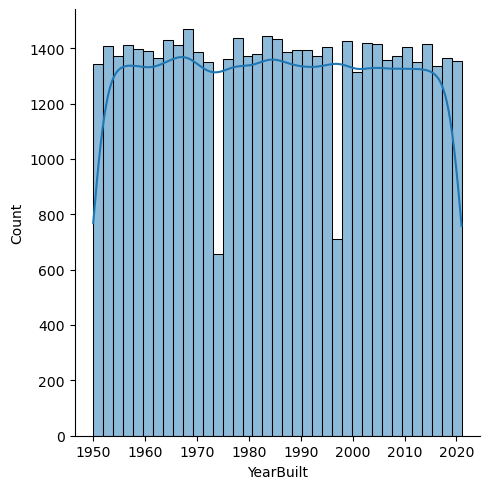

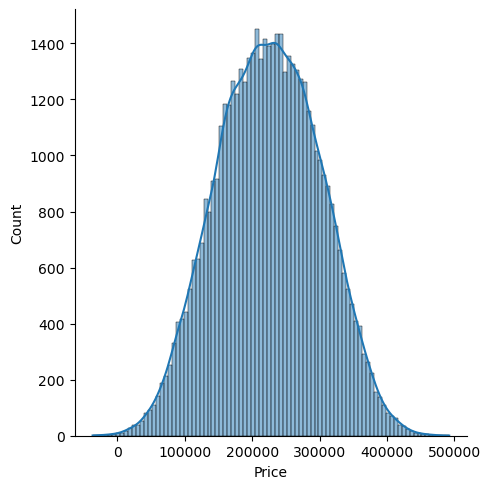

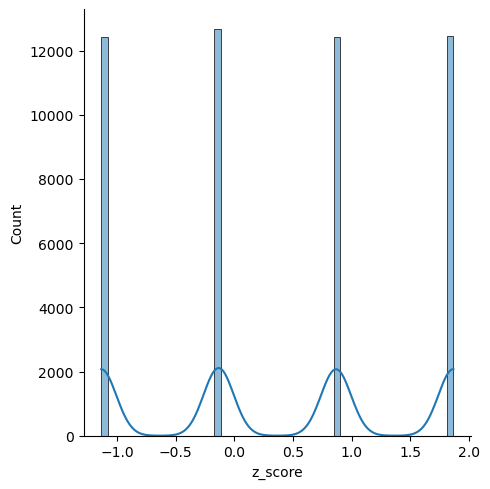

In [17]:
for col in df.select_dtypes(include = ["number"]):
    print(col)
    print(skew(df[col]))
    
    sns.displot(df[col],kde=True)

Handling Categorical Data

Using One Hot Encoding

In [18]:
encoded_data = pd.get_dummies(df)

In [19]:
encoded_data.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,z_score,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,0.865879,True,False,False
1,2459,3,2,1980,195014.221626,-0.134121,True,False,False
2,1860,2,1,1970,306891.012076,-1.134121,False,True,False
3,2294,2,1,1996,206786.787153,-1.134121,False,False,True
4,2130,5,2,2001,272436.239065,1.865879,False,True,False


In [20]:
encoded_data.tail()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,z_score,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
49995,1282,5,3,1975,100080.865895,1.865879,True,False,False
49996,2854,2,2,1988,374507.656727,-1.134121,False,True,False
49997,2979,5,3,1962,384110.555590,1.865879,False,True,False
49998,2596,5,2,1984,380512.685957,1.865879,True,False,False
49999,1572,5,3,2011,221618.583218,1.865879,True,False,False


Spliting The DataSet Into Dependent Variable and Independent Variable

In [21]:
Y = encoded_data["Price"]
X = encoded_data.drop("Price",axis=1)

Spliting DataSet Into Training And Testing

In [22]:
#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
print(X_train,y_train)

       SquareFeet  Bedrooms  Bathrooms  YearBuilt   z_score  \
39087        2498         2          3       2021 -1.134121   
30893        2380         5          3       1977  1.865879   
45278        2274         5          2       1957  1.865879   
16398        2215         5          1       1977  1.865879   
13653        2078         2          3       1962 -1.134121   
...           ...       ...        ...        ...       ...   
11284        2166         5          3       1996  1.865879   
44732        2463         4          1       1953  0.865879   
38158        2812         4          2       2010  0.865879   
860          2188         3          1       1979 -0.134121   
15795        2649         5          3       1953  1.865879   

       Neighborhood_Rural  Neighborhood_Suburb  Neighborhood_Urban  
39087                True                False               False  
30893               False                False                True  
45278               False           

Fitting The Linear Regression Model

In [25]:
#Importing Linear Regression from Sklearn
from sklearn.linear_model import LinearRegression

In [26]:
#Calling The Model
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

Making Predictions

In [28]:
predictions = model.predict(X_train)
predictions

array([268317.04043654, 273952.58422181, 260567.73304747, ...,
       308482.18209806, 238469.50310819, 299396.95219328])

Accuracy

In [32]:
accuracy = model.score(X_test,y_test)
print(accuracy)

0.5755628630306235


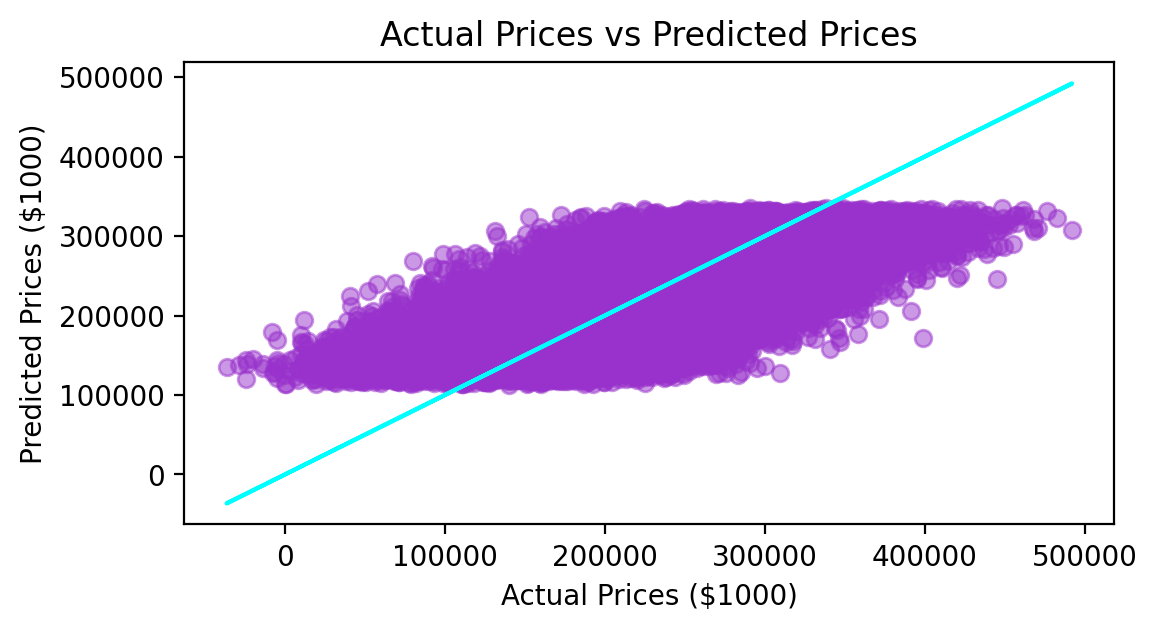

: 

In [35]:

# Scatter plot of the data points
plt.figure(figsize=(6, 3),dpi=200)

plt.scatter(
    x=y_train,
    y=predictions,
    c='darkorchid',
    alpha=0.5,
)
plt.plot(y_train, y_train, color='aqua')

plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices ($1000)')
plt.ylabel('Predicted Prices ($1000)')
plt.show()